## Spring 2021 - Smart Buildings and Cities - Project

### Steps

1. Imputing missing values



** 1. Imputing missing values **

In [1]:
# 1.1 read basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix

In [3]:
# 1.2 read csv data as pandas dataframe
df = pd.read_csv('reprocess_remove no survey.csv')

In [4]:
# 1.2 print first five rows
df.head()

,Home_ID,FloorArea_sqft,CeilingHgt_ft,N_Bedrm,N_FullBath,N_HalfBath,Oven_Fuel,Num_Occupant,WHV_AsFound,AF1_Condition,...,NO2_AQL_IN1,FRM_ADJ_IN1,FRM_ADJ_BR1,T_ETC_IN1,RH_ETC_IN1,FRM_IN_ppb,NO2_IAQm_ppb,NOx_IAQm_ppb,Satisfaction_3points,Satisfaction_2points
0,1,2001,9,3,2,1,1,4.0,0.0,3.0,...,0.021302,10.522139,12.337049,23.269313,39.705435,14.252478,4.874853,20.336480,0,0
1,3,3104,10,4,3,0,0,2.0,1.0,1.0,...,0.048584,39.239283,42.685868,24.420784,45.021151,NaN,NaN,NaN,1,1
2,4,3248,11,3,3,1,0,2.0,0.0,1.0,...,0.153633,16.158558,16.637428,20.264354,45.067446,20.250339,1.708403,2.617361,1,1
3,5,2317,9,4,2,0,1,3.0,0.0,1.0,...,0.049589,23.635695,27.127771,25.372127,37.459627,NaN,2.776921,7.139446,0,0
4,6,3108,11,3,2,1,0,2.0,0.0,1.0,...,0.250460,27.351496,43.769564,25.585127,38.000461,44.742541,5.076926,25.850207,0,0


In [5]:
# 1.3 how many buildings in this dataset? 
len(df)

89

In [6]:
# Imputation with median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df)
df_m = imp_median.transform(df)

** 2. Assign Features **

In [7]:
# building characteristics
X1 = df_m[:,np.r_[1:15]]
df.iloc[:,np.r_[1:15]].head()

,FloorArea_sqft,CeilingHgt_ft,N_Bedrm,N_FullBath,N_HalfBath,Oven_Fuel,Num_Occupant,WHV_AsFound,AF1_Condition,RHD_Grease_Screen_Condition,RHD_Fan_Airflow_Adjusted_Low_cfm,RHD_Fan_Airflow_Adjusted_High_cfm,EXF_BA1_Measured_cfm,Depressurization_Q50_cfm
0,2001,9,3,2,1,1,4.0,0.0,3.0,2.0,88.505747,133.333333,91.0,1006.0
1,3104,10,4,3,0,0,2.0,1.0,1.0,NaN,107.000000,326.000000,49.0,NaN
2,3248,11,3,3,1,0,2.0,0.0,1.0,2.0,310.000000,1046.000000,101.0,2224.0
3,2317,9,4,2,0,1,3.0,0.0,1.0,NaN,81.609195,143.678161,NaN,NaN
4,3108,11,3,2,1,0,2.0,0.0,1.0,NaN,360.000000,806.000000,81.0,NaN


In [26]:
# air quality measurement
X2 = df_m[:,np.r_[15:19,22:27]]
df.iloc[:,np.r_[15:19,22:27]].head()

,PM_MET_IN1,PM_MET_OUT,CO2_ETC_IN1,CO2_ETC_BR1,T_ETC_IN1,RH_ETC_IN1,FRM_IN_ppb,NO2_IAQm_ppb,NOx_IAQm_ppb
0,2.011464,8.855427,640.476489,727.076213,23.269313,39.705435,14.252478,4.874853,20.336480
1,5.959333,2.406069,830.593753,846.815114,24.420784,45.021151,NaN,NaN,NaN
2,11.291269,4.427615,512.227439,605.783042,20.264354,45.067446,20.250339,1.708403,2.617361
3,1.074514,3.324214,671.966967,734.965862,25.372127,37.459627,NaN,2.776921,7.139446
4,NaN,4.623322,603.374908,684.653495,25.585127,38.000461,44.742541,5.076926,25.850207


In [31]:
# Combination of building characteristics and air quality measurement
X3 = df_m[:,np.r_[11,13,14,18,23,26]]
df.iloc[:,np.r_[11,13,14,18,23,26]].head()

,RHD_Fan_Airflow_Adjusted_Low_cfm,EXF_BA1_Measured_cfm,Depressurization_Q50_cfm,CO2_ETC_BR1,RH_ETC_IN1,NOx_IAQm_ppb
0,88.505747,91.0,1006.0,727.076213,39.705435,20.336480
1,107.000000,49.0,NaN,846.815114,45.021151,NaN
2,310.000000,101.0,2224.0,605.783042,45.067446,2.617361
3,81.609195,NaN,NaN,734.965862,37.459627,7.139446
4,360.000000,81.0,NaN,684.653495,38.000461,25.850207


In [7]:
# Target
Y1 = df_m[:,28]


In [8]:
X4 = df_m[:,np.r_[1:15,15:19,22:27]]
df.iloc[:,np.r_[1:15,15:19,22:27]].head()

,FloorArea_sqft,CeilingHgt_ft,N_Bedrm,N_FullBath,N_HalfBath,Oven_Fuel,Num_Occupant,WHV_AsFound,AF1_Condition,RHD_Grease_Screen_Condition,...,Depressurization_Q50_cfm,PM_MET_IN1,PM_MET_OUT,CO2_ETC_IN1,CO2_ETC_BR1,T_ETC_IN1,RH_ETC_IN1,FRM_IN_ppb,NO2_IAQm_ppb,NOx_IAQm_ppb
0,2001,9,3,2,1,1,4.0,0.0,3.0,2.0,...,1006.0,2.011464,8.855427,640.476489,727.076213,23.269313,39.705435,14.252478,4.874853,20.336480
1,3104,10,4,3,0,0,2.0,1.0,1.0,NaN,...,NaN,5.959333,2.406069,830.593753,846.815114,24.420784,45.021151,NaN,NaN,NaN
2,3248,11,3,3,1,0,2.0,0.0,1.0,2.0,...,2224.0,11.291269,4.427615,512.227439,605.783042,20.264354,45.067446,20.250339,1.708403,2.617361
3,2317,9,4,2,0,1,3.0,0.0,1.0,NaN,...,NaN,1.074514,3.324214,671.966967,734.965862,25.372127,37.459627,NaN,2.776921,7.139446
4,3108,11,3,2,1,0,2.0,0.0,1.0,NaN,...,NaN,NaN,4.623322,603.374908,684.653495,25.585127,38.000461,44.742541,5.076926,25.850207


** 3. Use X1, X2, X3 to fit target satisfaction **

In [9]:
# X1, Y1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.1, random_state=0)

In [28]:
# X2, Y1
X_train, X_test, y_train, y_test = train_test_split(X2, Y1, test_size = 0.1, random_state=0)

In [32]:
# X3, Y1
X_train, X_test, y_train, y_test = train_test_split(X3, Y1, test_size = 0.1, random_state=0)

In [9]:
# X4, Y1
X_train, X_test, y_train, y_test = train_test_split(X4, Y1, test_size = 0.1, random_state=0)

In [125]:
# Assign six different classification models (decision tree, knn, svm (use SVC), MLP, NB, RF)
model1_DT = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model2_KNN = KNeighborsClassifier(n_neighbors = 5)
model3_SVM = SVC()
model4_MLP = MLPClassifier(max_iter = 2000)
model5_NB = GaussianNB()
model6_RF = RandomForestClassifier(criterion = 'entropy',random_state=0,max_depth=4,n_estimators=30)
model7_LR = LogisticRegressionCV(cv=10,random_state=0)


In [34]:
# standardization of X train
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [35]:
# train your models
model1_DT = model1_DT.fit(X_scaled, y_train)
model2_KNN = model2_KNN.fit(X_scaled, y_train)
model3_SVM = model3_SVM.fit(X_scaled, y_train)
model4_MLP = model4_MLP.fit(X_scaled, y_train)
model5_NB = model5_NB.fit(X_scaled, y_train)
model6_RF = model6_RF.fit(X_scaled, y_train)
model7_LR = model7_LR.fit(X_scaled, y_train)

In [126]:
# cross validate your models with 10-fold cross validation
model1_DT_cv = cross_val_score(model1_DT, X_scaled, y_train,cv=10,scoring='accuracy')
model2_KNN_cv = cross_val_score(model2_KNN, X_scaled, y_train,cv=10,scoring='accuracy')
model3_SVM_cv = cross_val_score(model3_SVM, X_scaled, y_train,cv=10,scoring='accuracy')
model4_MLP_cv = cross_val_score(model4_MLP, X_scaled, y_train,cv=10,scoring='accuracy')
model5_NB_cv = cross_val_score(model5_NB, X_scaled, y_train,cv=10,scoring='accuracy')
model6_RF_cv = cross_val_score(model6_RF, X_scaled, y_train,cv=10,scoring='accuracy')
model7_LR_cv = cross_val_score(model7_LR, X_scaled, y_train,cv=10,scoring='accuracy')
print(model1_DT_cv)
print(model2_KNN_cv)
print(model3_SVM_cv)
print(model4_MLP_cv)
print(model5_NB_cv)
print(model6_RF_cv)
print(model7_LR_cv)

[0.625 0.875 0.75  0.75  0.75  0.625 0.375 0.375 0.5   0.625]
[0.75  0.5   0.625 0.75  0.5   0.375 0.375 0.375 0.5   0.625]
[0.5   0.75  0.625 0.5   0.625 0.75  0.625 0.625 0.5   0.5  ]
[0.75  0.875 0.75  0.625 0.375 0.625 0.5   0.375 0.375 0.5  ]
[0.25  0.875 0.375 0.375 0.875 0.375 0.375 0.625 0.5   0.625]
[0.625 0.75  0.625 0.5   0.625 0.875 0.375 0.875 0.5   0.625]
[0.5   0.5   0.5   0.5   0.625 0.375 0.5   0.625 1.    0.75 ]


In [127]:
# print the averaged CV scores for each model 
print("The averaged CV scores for the decision tree model is %0.2f with a standard deviation of %0.2f " % (model1_DT_cv.mean(),model1_DT_cv.std() ))
print("The averaged CV scores for the KNN model is %0.2f with a standard deviation of %0.2f" % (model2_KNN_cv.mean(),model2_KNN_cv.std()))
print("The averaged CV scores for the SVM model is %0.2f with a standard deviation of %0.2f" % (model3_SVM_cv.mean(),model3_SVM_cv.std()))
print("The averaged CV scores for the MLP model is %0.2f with a standard deviation of %0.2f" % (model4_MLP_cv.mean(),model4_MLP_cv.std()))
print("The averaged CV scores for the NB model is %0.2f with a standard deviation of %0.2f" % (model5_NB_cv.mean(),model5_NB_cv.std()))
print("The averaged CV scores for the RF model is %0.2f with a standard deviation of %0.2f" % (model6_RF_cv.mean(),model6_RF_cv.std()))
print("The averaged CV scores for the LR model is %0.2f with a standard deviation of %0.2f" % (model7_LR_cv.mean(),model7_LR_cv.std()))

The averaged CV scores for the decision tree model is 0.62 with a standard deviation of 0.16 
The averaged CV scores for the KNN model is 0.54 with a standard deviation of 0.14
The averaged CV scores for the SVM model is 0.60 with a standard deviation of 0.09
The averaged CV scores for the MLP model is 0.57 with a standard deviation of 0.17
The averaged CV scores for the NB model is 0.53 with a standard deviation of 0.21
The averaged CV scores for the RF model is 0.64 with a standard deviation of 0.15
The averaged CV scores for the LR model is 0.59 with a standard deviation of 0.17


In [38]:
# standardization of X test
X_test_scaled = scaler.transform(X_test)

print(model1_DT.score(X_test_scaled,y_test))
print(model2_KNN.score(X_test_scaled,y_test))
print(model3_SVM.score(X_test_scaled,y_test))
print(model4_MLP.score(X_test_scaled,y_test))
print(model5_NB.score(X_test_scaled,y_test))
print(model6_RF.score(X_test_scaled,y_test))
print(model7_LR.score(X_test_scaled,y_test))

0.7777777777777778
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.7777777777777778
0.7777777777777778
0.4444444444444444


In [16]:
predict1_DT = model1_DT.predict(X_test_scaled)
predict2_KNN = model2_KNN.predict(X_test_scaled)
predict3_SVM = model3_SVM.predict(X_test_scaled)
predict4_MLP = model4_MLP.predict(X_test_scaled)
predict5_NB = model5_NB.predict(X_test_scaled)
predict6_RF = model6_RF.predict(X_test_scaled)
predict7_LR = model7_LR.predict(X_test_scaled)
print(accuracy_score(predict1_DT,y_test))
print(accuracy_score(predict2_KNN,y_test))
print(accuracy_score(predict3_SVM,y_test))
print(accuracy_score(predict4_MLP,y_test))
print(accuracy_score(predict5_NB,y_test))
print(accuracy_score(predict6_RF,y_test))
print(accuracy_score(predict7_LR,y_test))

0.6666666666666666
0.6666666666666666
0.6666666666666666
0.7777777777777778
0.6666666666666666
0.5555555555555556
0.5555555555555556


In [19]:
X_test_scaled.mean(axis=0)


array([ 0.07622333,  0.18508249, -0.1338151 ,  0.00744055, -0.11118423,
       -0.01399868, -0.46774709, -0.69734145, -0.44530399,  0.01565753,
       -0.00598034,  0.41230896,  0.38462569,  0.01379957])

In [20]:
X_test_scaled.std(axis=0)

array([0.65457034, 0.8634925 , 0.47310782, 0.53240244, 0.96762002,
       1.0016643 , 0.63278981, 0.63497126, 0.91600718, 1.18096458,
       1.37267701, 1.88449919, 0.95012894, 0.92386194])

In [39]:
model6_RF.feature_importances_

array([0.2068194 , 0.15030621, 0.18723814, 0.19247763, 0.16568242,
       0.0974762 ])

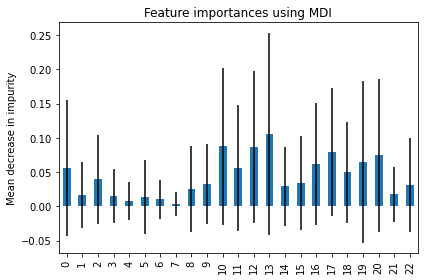

In [22]:
std = np.std([tree.feature_importances_ for tree in model6_RF.estimators_], axis=0)
importances = model6_RF.feature_importances_
forest_importances = pd.Series(importances)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
model6_RF.feature_importances_>0.068

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False])

In [19]:
model7_LR.coef_

array([[ 0.05497153,  0.11478658,  0.04228553,  0.06013758,  0.10146957,
        -0.06253339, -0.00985173,  0.01575927,  0.16083979, -0.17426301,
         0.06573832,  0.08725023,  0.07994005,  0.13089971,  0.07395939,
         0.06727979, -0.07050415, -0.05231991,  0.10865046, -0.17946336,
        -0.23543069,  0.02121065, -0.02147091]])

In [291]:
np.abs(model7_LR.coef_)>0.1148

array([[False, False, False, False, False, False, False, False,  True,
         True, False, False, False,  True, False, False, False, False,
        False,  True,  True, False, False]])

In [40]:
model1_DT.feature_importances_

array([0.06927387, 0.10519919, 0.21068747, 0.22422884, 0.24128041,
       0.14933021])

** find the best hyperparameters **

In [41]:
model1_DT = DecisionTreeClassifier(random_state=0)
parameters = {'ccp_alpha':np.arange(0,0.1,0.005),'criterion':['entropy'],'max_depth':np.arange(3,9,1)}
model1_DT_grid = GridSearchCV(model1_DT, parameters, cv=10, refit=True,scoring='accuracy')
model1_DT_grid.fit(X_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095]),
                         'criterion': ['entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8])})

In [42]:
# 4.2 what is the best parameter setting you find? (5 pt)
model1_DT_grid.best_params_


{'ccp_alpha': 0.045, 'criterion': 'entropy', 'max_depth': 8}

In [43]:
# 4.3 what is the best CV accuracy you find? (5 pt)
model1_DT_grid.best_score_


0.6625

In [44]:
model1_DT_grid.score(X_test_scaled,y_test)

0.6666666666666666

In [81]:
model1_DT = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=0.045,random_state=0,max_depth=8)
model1_DT = model1_DT.fit(X_scaled, y_train)
model1_DT_cv = cross_val_score(model1_DT, X_scaled, y_train,cv=10)
print(model1_DT_cv.mean())
print(model1_DT.score(X_test_scaled,y_test))

0.6625
0.6666666666666666


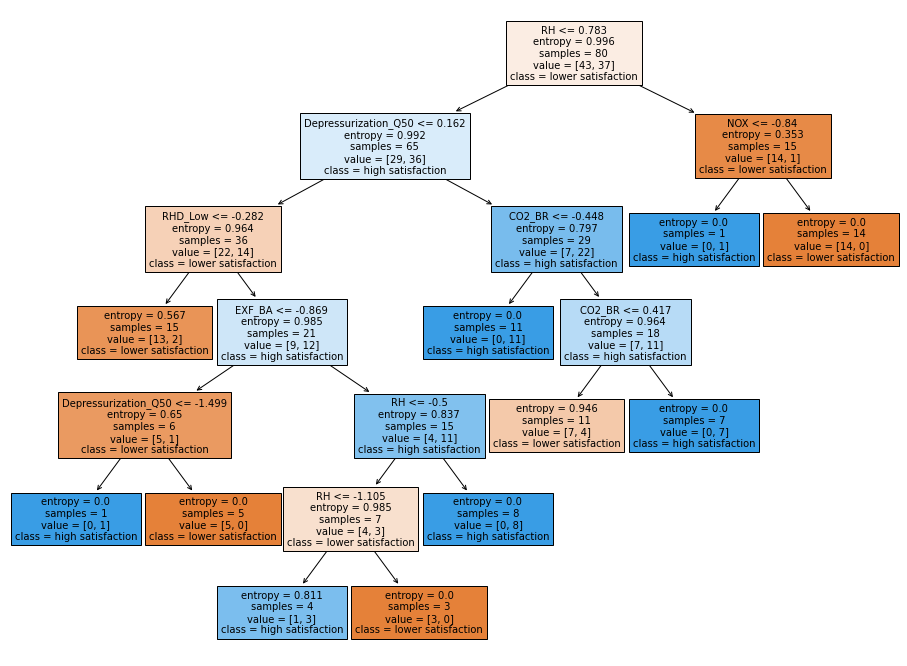

In [82]:
# plot tree
plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
_=tree.plot_tree(model1_DT, fontsize=10,filled = True,feature_names=['RHD_Low','EXF_BA','Depressurization_Q50','CO2_BR','RH','NOX'],class_names=['lower satisfaction','high satisfaction'])
plt.show()

In [47]:
model6_RF = RandomForestClassifier(random_state=0,n_estimators=30)
parameters = {'ccp_alpha':np.arange(0,0.1,0.005),'criterion':['entropy'],'max_depth':np.arange(3,9,1)}
model6_RF_grid = GridSearchCV(model6_RF, parameters, cv=10, refit=True,scoring='accuracy')
model6_RF_grid.fit(X_scaled, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=30, random_state=0),
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095]),
                         'criterion': ['entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8])})

In [48]:
model6_RF_grid.best_params_

{'ccp_alpha': 0.06, 'criterion': 'entropy', 'max_depth': 6}

In [49]:
model6_RF_grid.best_score_

0.725

In [50]:
model6_RF_grid.score(X_test_scaled,y_test)

0.7777777777777778

In [123]:
model6_RF_best = RandomForestClassifier(criterion = 'entropy', random_state=0,max_depth=6,n_estimators=30,ccp_alpha=0.06)
model6_RF_best = model6_RF_best.fit(X_scaled, y_train)
model6_RF_best_cv = cross_val_score(model6_RF_best, X_scaled, y_train,cv=10,scoring='accuracy')
print(model6_RF_best_cv.mean())
print(model6_RF_best.score(X_test_scaled,y_test))

0.725
0.7777777777777778


In [131]:
model6_RF_best.feature_importances_

array([0.23337128, 0.15047238, 0.20479479, 0.1566761 , 0.16178532,
       0.09290012])

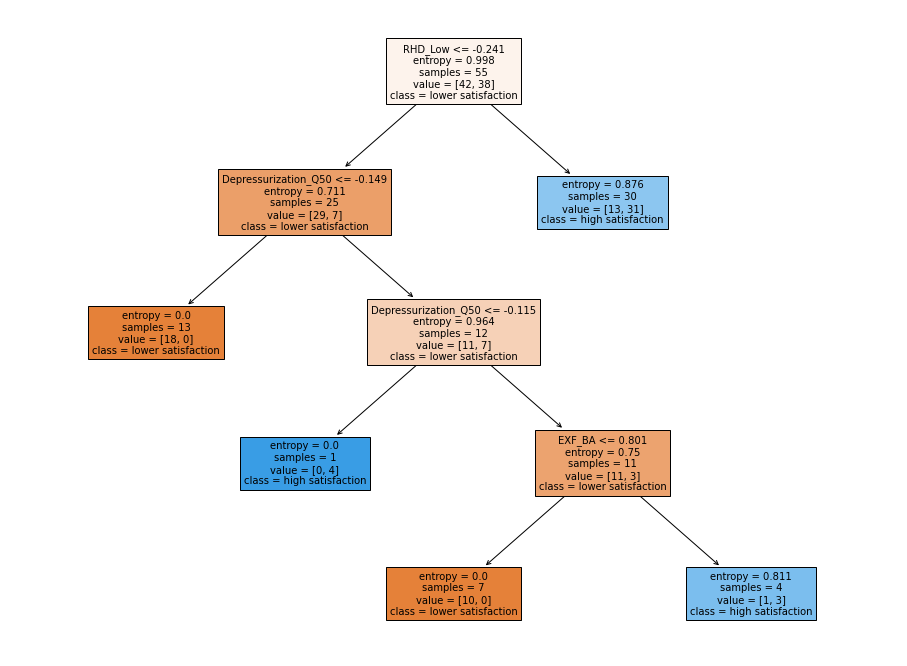

In [119]:
plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
_=tree.plot_tree(model6_RF_best.estimators_[29], fontsize=10,filled = True,feature_names=['RHD_Low','EXF_BA','Depressurization_Q50','CO2_BR','RH','NOX'],class_names=['lower satisfaction','high satisfaction'])
plt.show()


** Check with random targets **

In [ ]:
# linear regression
X_L = df_m[:,np.r_[1,11,13,14]]
scaler_L = preprocessing.StandardScaler().fit(X_L)
X_L_scaled = scaler_L.transform(X_L)
Y_L = df_m[:,np.r_[27]]
reg = LinearRegression().fit(X_L_scaled, Y_L)
reg.score(X_L_scaled, Y_L)

In [23]:
# Random shuffled target
score1_cv = []
score1_test = []
score2_cv = []
score2_test = []
score3_cv = []
score3_test = []
score4_cv = []
score4_test = []
score5_cv = []
score5_test = []
score6_cv = []
score6_test = []
score7_cv = []
score7_test = []

for i in range(10):
    Y_random = np.array(random.sample(list(Y1), len(Y1)))
    X_train, X_test, y_train, y_test = train_test_split(X4, Y_random, test_size = 0.1)
    # Assign 7 different classification models (decision tree, knn, svm (use SVC), MLP, NB, RF)
    model1_DT = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    model2_KNN = KNeighborsClassifier(n_neighbors = 5)
    model3_SVM = SVC()
    model4_MLP = MLPClassifier(max_iter = 2000)
    model5_NB = GaussianNB()
    model6_RF = RandomForestClassifier(criterion = 'entropy', random_state=0,max_depth=4,n_estimators=30)
    model7_LR = LogisticRegressionCV(cv=10,random_state=0)

    # standardization of X train
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)

    # train your models
    model1_DT = model1_DT.fit(X_scaled, y_train)
    model2_KNN = model2_KNN.fit(X_scaled, y_train)
    model3_SVM = model3_SVM.fit(X_scaled, y_train)
    model4_MLP = model4_MLP.fit(X_scaled, y_train)
    model5_NB = model5_NB.fit(X_scaled, y_train)
    model6_RF = model6_RF.fit(X_scaled, y_train)
    model7_LR = model7_LR.fit(X_scaled, y_train)

    # cross validate your models with 10-fold cross validation
    score1_cv.append(cross_val_score(model1_DT, X_scaled, y_train,cv=10).mean())
    score2_cv.append(cross_val_score(model2_KNN, X_scaled, y_train,cv=10).mean())
    score3_cv.append(cross_val_score(model3_SVM, X_scaled, y_train,cv=10).mean())
    score4_cv.append(cross_val_score(model4_MLP, X_scaled, y_train,cv=10).mean())
    score5_cv.append(cross_val_score(model5_NB, X_scaled, y_train,cv=10).mean())
    score6_cv.append(cross_val_score(model6_RF, X_scaled, y_train,cv=10).mean())
    score7_cv.append(cross_val_score(model7_LR, X_scaled, y_train,cv=10).mean())

    # standardization of X test
    X_test_scaled = scaler.transform(X_test)

    score1_test.append(model1_DT.score(X_test_scaled,y_test))
    score2_test.append(model2_KNN.score(X_test_scaled,y_test))
    score3_test.append(model3_SVM.score(X_test_scaled,y_test))
    score4_test.append(model4_MLP.score(X_test_scaled,y_test))
    score5_test.append(model5_NB.score(X_test_scaled,y_test))
    score6_test.append(model6_RF.score(X_test_scaled,y_test))
    score7_test.append(model7_LR.score(X_test_scaled,y_test))
    


C:\Users\mtang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mtang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [24]:
# Decision Tree
print(np.mean(score1_cv))
print(np.mean(score1_test))

0.51
0.44444444444444436


In [25]:
print(np.mean(score2_cv))
print(np.mean(score2_test))

0.5075000000000001
0.4444444444444445


In [26]:
print(np.mean(score3_cv))
print(np.mean(score3_test))

0.5450000000000002
0.4222222222222222


In [27]:
print(np.mean(score4_cv))
print(np.mean(score4_test))

0.51875
0.44444444444444436


In [28]:
print(np.mean(score5_cv))
print(np.mean(score5_test))

0.52
0.4888888888888888


In [29]:
print(np.mean(score6_cv))
print(np.mean(score6_test))

0.495
0.41111111111111115


In [30]:
print(np.mean(score7_cv))
print(np.mean(score7_test))

0.50625
0.4999999999999999


** problem 5 (10 points) **

In [51]:
# 5.1 assign your prediction result from test set (2 pt)

final_predict = model6_RF_grid.predict(X_test_scaled)

In [54]:
# 5.2 calculate the accuracy score from test set (4 pt)
# is the final accuracy different from your best CV accuracy? 
# explain why they are different.
# student answer is ... Yes, they are different because the final score was calculated using the test set and the model trained on all training data, while the best CV accuracy was calculated using part of the training data and the model trained on the remaining training data.
model6_RF_grid.score(X_test_scaled,y_test)


0.7777777777777778

In [53]:
# 5.3 report confusion matrix and interprete it in one sentence (4 pt)
# student answer is ... 932 of the samples belonging to Category 0 and 8 belonging to Category 1 are classified correctly, the number of false positives is 11, and the number of false negatives is 187.
confusion_matrix(y_test, final_predict)


array([[3, 0],
       [2, 4]], dtype=int64)

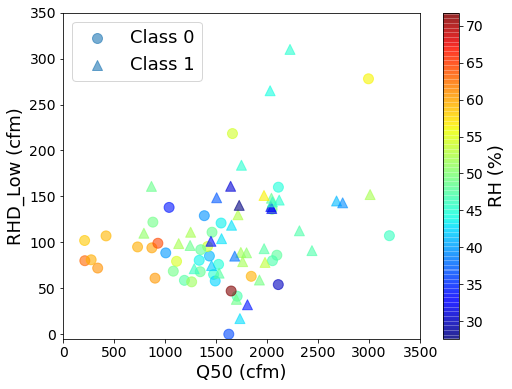

In [140]:
# plot
x = df.iloc[:,14] #Depression
y = df.iloc[:,11] #RHD_Low
z = df.iloc[:,23] #RH
target = df.iloc[:,28]
fig, ax = plt.subplots(frameon=False)
fig.set_size_inches(8,6)
mi = np.min(z)
ma = np.max(z)
norm = matplotlib.colors.Normalize(vmin=mi,vmax=ma)
ax.scatter(x[target==0], y[target==0], alpha=0.6, c=z[target==0], cmap='jet',marker='o',s=100,norm=norm, label = 'Class 0')
im=ax.scatter(x[target==1], y[target==1], alpha=0.6, c=z[target==1], cmap='jet',marker='^',s=100,norm=norm, label = 'Class 1')
cbar = fig.colorbar(im, ax=ax)
cbar.solids.set(alpha=0.6)
cbar.ax.set_ylabel('RH (%)',fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('Q50 (cfm)',fontsize=18)
plt.ylabel('RHD_Low (cfm)',fontsize=18)
ax.legend(fontsize=18,loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(0,  3500)
plt.ylim(-5,  350)
plt.savefig('pic2.png', dpi=150)

In [323]:
df.iloc[:,28]

0     0
1     1
2     1
3     0
4     0
     ..
84    0
85    0
86    0
87    1
88    1
Name: Satisfaction_2points, Length: 89, dtype: int64

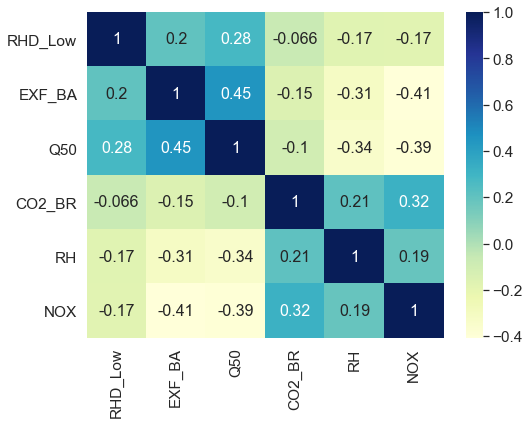

In [143]:
fig, ax = plt.subplots(figsize=(8,6)) 
X3_df = pd.DataFrame(X3,columns = ['RHD_Low','EXF_BA','Q50','CO2_BR','RH','NOX'])
corr = X3_df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu",annot_kws={'size':16})
plt.savefig('heatmap.png', dpi=150)